In [1]:
import numpy as np
from scipy.stats import norm

### 1. 

In [3]:


probability = 0.005
z_score = norm.ppf(probability)

print(f"The Z-score for a probability of {probability} is approximately {z_score:.4f}")

probability = 1 - 0.005
z_score = norm.ppf(probability)

print(f"The Z-score for a probability of {probability} is approximately {z_score:.4f}")


The Z-score for a probability of 0.005 is approximately -2.5758
The Z-score for a probability of 0.995 is approximately 2.5758


### 2. 

In [5]:
z_obs = (1.3 - 2) / (2.6 / np.sqrt(50))
print(z_obs)

-1.903749026271474


In [7]:
norm.ppf(0.05)

-1.6448536269514729

In [12]:
norm.ppf(0.025)

-1.9599639845400545

In [10]:
from scipy.stats import t
import numpy as np

# Given data
x_bar = 2.4  # Sample mean
mu_0 = 2.3  # Hypothesized population mean
s = 0.29  # Sample standard deviation
n = 35  # Sample size
alpha = 0.05  # Significance level

# Calculating the t-score
t_score = (x_bar - mu_0) / (s / np.sqrt(n))


In [11]:

# Degrees of freedom
df = n - 1

# Finding the critical t-value for a one-tailed test
critical_t = t.ppf(1 - alpha, df)

t_score, critical_t


(2.040027511413663, 1.6909242507706543)

### 3.

In [4]:
x_bar = 79.7
mu_0 = 80
n = 100
s = 0.8
alpha = 0.025
z_obs = (x_bar - mu_0) / (s / np.sqrt(n))
print(z_obs)

-3.7499999999999645


### 4.

In [5]:
x = [103.768, 92.295, 100.615, 102.754, 88.602, 61.675, 88.017, 108.579, 73.003, 90.677, 71.210, 73.154, 123.086, 84.023, 82.115, 106.755, 91.052, 76.014, 89.222, 90.479]

In [12]:
x_bar = np.mean(x)
mu_0 = 100
n = len(x)
s = np.std(x, ddof=1)

In [13]:
alpha=0.01
# Degrees of freedom
df = n - 1

# Finding the critical t-value for a one-tailed test
critical_t = t.ppf(1 - alpha, df)
print(critical_t)

2.539483190622288


In [14]:
t_score = (x_bar - mu_0) / (s / np.sqrt(n))
print(t_score)

-3.0443091128687287


### 5.

In [34]:
df = 15
alpha = 0.01
critical_t = t.ppf(1- alpha, df)
print(critical_t)

2.602480294995493


In [24]:
mu_0 = 100
mu_a = 108
n = 16
s = 16

t_score = (mu_0 - mu_a) / (s / np.sqrt(n)) + critical_t
print(t_score)

beta = t.cdf(t_score, df)
print(beta)
print(f'Power is {1 - beta:.3f}')

0.6024802949954928
0.7220731301416176
Power is 0.278


In [25]:
def calc_power(mu_a):
    df = 15
    alpha = 0.01
    critical_t = t.ppf(1- alpha, df)
    mu_0 = 100
    n = 16
    s = 16

    t_score = (mu_0 - mu_a) / (s / np.sqrt(n)) + critical_t
    print(t_score)

    beta = t.cdf(t_score, df)
    print(beta)
    print(f'Power is {1 - beta:.3f}')
    
    return 1 - beta

In [26]:
calc_power(112)

-0.3975197050045072
0.3482918928052724
Power is 0.652


0.6517081071947276

In [27]:
calc_power(116)

-1.3975197050045072
0.0912929752661666
Power is 0.909


0.9087070247338334

In [28]:
powers = []
for i in range(100, 120):
    powers.append(calc_power(i))

2.602480294995493
0.9899999999996888
Power is 0.010
2.352480294995493
0.9836399947013839
Power is 0.016
2.102480294995493
0.9735959023912326
Power is 0.026
1.8524802949954928
0.958131566542057
Power is 0.042
1.6024802949954928
0.9350528682375366
Power is 0.065
1.3524802949954928
0.9018699638970213
Power is 0.098
1.1024802949954928
0.8561859912749276
Power is 0.144
0.8524802949954928
0.7963232412810126
Power is 0.204
0.6024802949954928
0.7220731301416176
Power is 0.278
0.3524802949954928
0.6353091136984199
Power is 0.365
0.10248029499549283
0.5401335379389474
Power is 0.460
-0.14751970500450717
0.4423432291344811
Power is 0.558
-0.3975197050045072
0.3482918928052724
Power is 0.652
-0.6475197050045072
0.2635412313219255
Power is 0.736
-0.8975197050045072
0.19181072182722902
Power is 0.808
-1.1475197050045072
0.1345702555782445
Power is 0.865
-1.3975197050045072
0.0912929752661666
Power is 0.909
-1.6475197050045072
0.06011716007003062
Power is 0.940
-1.8975197050045072
0.03858922070860771

In [50]:
from pathlib import Path
fig_dir = Path('figs/1-hypothesis-testing')
fig_dir.mkdir(parents=True, exist_ok=True)

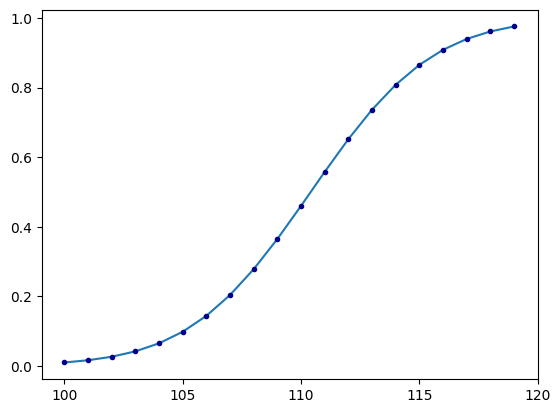

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(100, 120), powers)
plt.plot(range(100, 120), powers, '.', color='darkblue')
plt.xticks([100, 105, 110, 115, 120])
plt.savefig(fig_dir / 'power_curve.png', dpi=300)

In [37]:
def calc_power_v2(mu_a, alpha=0.01):
    
    mu_0 = 100
    n = 16
    df = n - 1
    s = 16
    
    critical_t = t.ppf(1- alpha, df)

    t_score = (mu_0 - mu_a) / (s / np.sqrt(n)) + critical_t
    beta = t.cdf(t_score, df)
    power = 1 - beta    
    return power

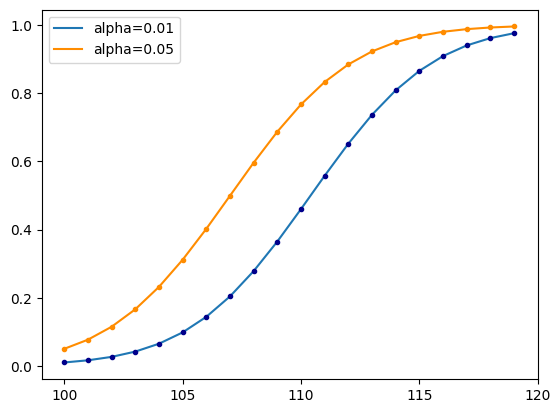

In [52]:
powers_001 = []
powers_005 = []
for i in range(100, 120):
    powers_001.append(calc_power_v2(i, 0.01))
    powers_005.append(calc_power_v2(i, 0.05))
plt.plot(range(100, 120), powers_001, label='alpha=0.01')
plt.plot(range(100, 120), powers_001, '.', color='darkblue')
plt.plot(range(100, 120), powers_005, label='alpha=0.05', color='darkorange')
plt.plot(range(100, 120), powers_005, '.', color='darkorange')
plt.xticks([100, 105, 110, 115, 120])
plt.legend()
plt.savefig(fig_dir / 'power_curve_alpha.png', dpi=300)

In [39]:
def calc_power_v3(mu_a, alpha=0.01, n=16):
    
    mu_0 = 100
    df = n - 1
    s = 16
    
    critical_t = t.ppf(1- alpha, df)

    t_score = (mu_0 - mu_a) / (s / np.sqrt(n)) + critical_t
    beta = t.cdf(t_score, df)
    power = 1 - beta    
    return power

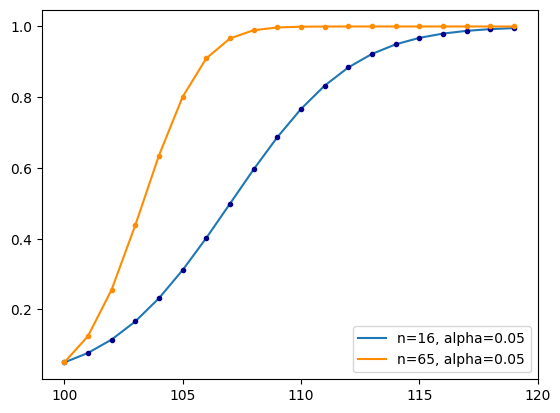

In [53]:
powers_16 = []
powers_65 = []
for i in range(100, 120):
    powers_16.append(calc_power_v3(i, 0.05, 16))
    powers_65.append(calc_power_v3(i, 0.05, 65))
plt.plot(range(100, 120), powers_16, label='n=16, alpha=0.05')
plt.plot(range(100, 120), powers_16, '.', color='darkblue')
plt.plot(range(100, 120), powers_65, label='n=65, alpha=0.05', color='darkorange')
plt.plot(range(100, 120), powers_65, '.', color='darkorange')
plt.xticks([100, 105, 110, 115, 120])
plt.legend()
plt.savefig(fig_dir / 'power_curve_n.png', dpi=300)

In [46]:
z_alpha = norm.ppf(1 - 0.05)

In [47]:
z_beta = norm.ppf(1 - 0.2)

In [48]:
n = (16 / 12 * (z_alpha + z_beta))**2

In [49]:
print(n)

10.991212856924026
